# Analysing & Preparing an Image Classification Dataset for Training

## Installation & Setting Up

In [ ]:
!pip install pip -U
!pip install fastdup
!pip install pandas
!pip install wurlitzer
%load_ext wurlitzer

## Download Data

In [ ]:
# download and extract imagenette
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
!tar -xf imagenette2-160.tgz

## Load and Format Annotations

In [1]:
import pandas as pd

In [2]:
data_dir = 'imagenette2-160/'
csv_path = 'imagenette2-160/noisy_imagenette.csv'

In [3]:
label_map = {
    'n02979186': 'cassette_player', 
    'n03417042': 'garbage_truck', 
    'n01440764': 'tench', 
    'n02102040': 'English_springer', 
    'n03028079': 'church',
    'n03888257': 'parachute', 
    'n03394916': 'French_horn', 
    'n03000684': 'chain_saw', 
    'n03445777': 'golf_ball', 
    'n03425413': 'gas_pump'
}

In [4]:
# load raw annotations
df_annot = pd.read_csv(csv_path)
df_annot.head(3)

path noisy_labels_0 noisy_labels_1  \
0   train/n02979186/n02979186_9036.JPEG      n02979186      n02979186   
1  train/n02979186/n02979186_11957.JPEG      n02979186      n02979186   
2   train/n02979186/n02979186_9715.JPEG      n02979186      n02979186   

  noisy_labels_5 noisy_labels_25 noisy_labels_50  is_valid  
0      n02979186       n02979186       n02979186     False  
1      n02979186       n02979186       n03000684     False  
2      n02979186       n03417042       n03000684     False

In [5]:
# change raw format to fastdup's format

# take relevant columns
df_annot = df_annot[['path', 'noisy_labels_0']]

# rename columns to fastdup's column names
df_annot = df_annot.rename({'noisy_labels_0': 'label', 'path': 'img_filename'}, axis='columns')

# create split column
df_annot['split'] = df_annot['img_filename'].apply(lambda x: x.split("/")[0])

# map label ids to regular labels
df_annot['label'] = df_annot['label'].map(label_map)

# show formated annotations
df_annot

img_filename            label  split
0               train/n02979186/n02979186_9036.JPEG  cassette_player  train
1              train/n02979186/n02979186_11957.JPEG  cassette_player  train
2               train/n02979186/n02979186_9715.JPEG  cassette_player  train
3              train/n02979186/n02979186_21736.JPEG  cassette_player  train
4      train/n02979186/ILSVRC2012_val_00046953.JPEG  cassette_player  train
...                                             ...              ...    ...
13389            val/n03425413/n03425413_17521.JPEG         gas_pump    val
13390            val/n03425413/n03425413_20711.JPEG         gas_pump    val
13391            val/n03425413/n03425413_19050.JPEG         gas_pump    val
13392            val/n03425413/n03425413_13831.JPEG         gas_pump    val
13393             val/n03425413/n03425413_1242.JPEG         gas_pump    val

[13394 rows x 3 columns]

## Import & Run fastdup

In [6]:
import fastdup
work_dir = 'fastdup_imagenette'

# run fastdup with annotations
fd = fastdup.create(work_dir=work_dir, input_dir=data_dir) 
fd.run(annotations=df_annot, ccthreshold=0.9, threshold=0.8)

/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py:290: UserWarning: Fastdup was already applied, use overwrite=True to re-run
  warnings.warn('Fastdup was already applied, use overwrite=True to re-run')


## Outliers

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26222.59it/s]

Stored outliers visual view in  fastdup_imagenette/galleries/outliers.html



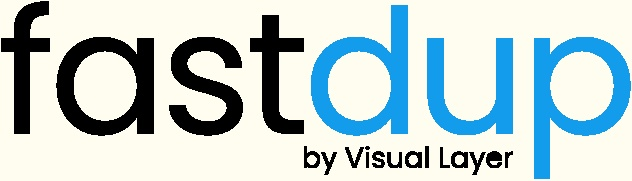
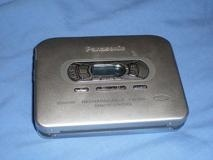
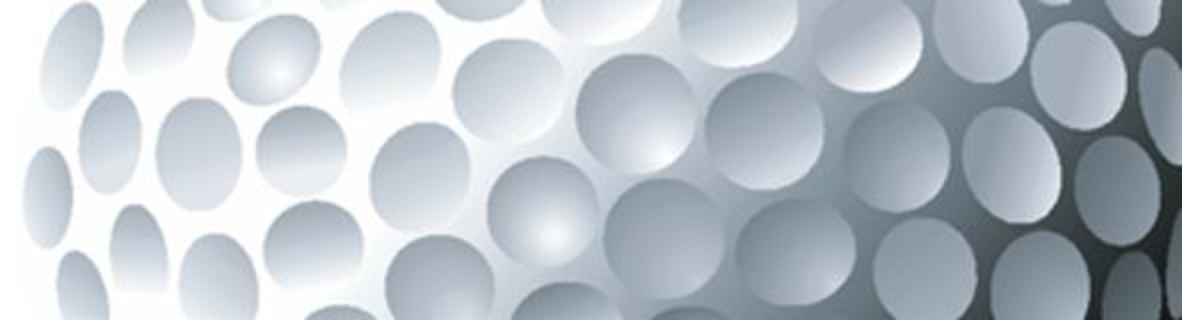
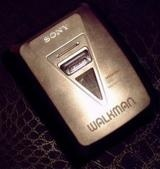
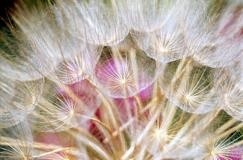
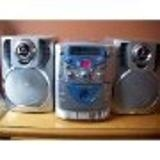
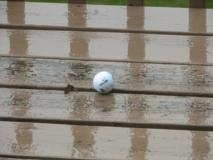
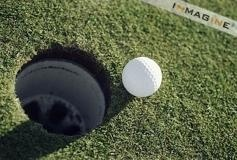
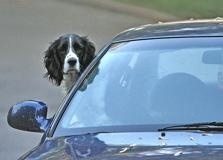
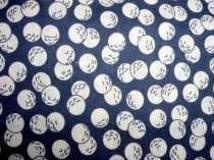
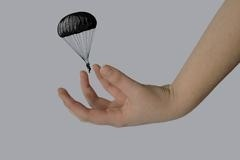
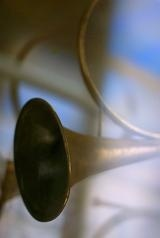
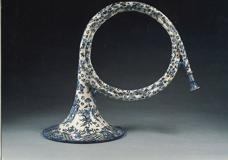
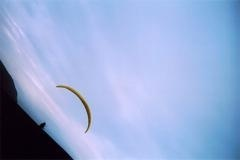
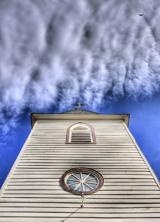
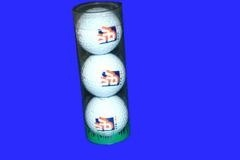
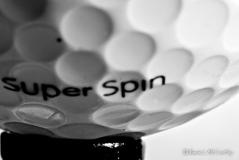
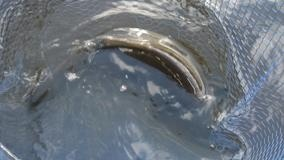
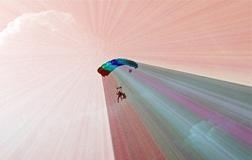
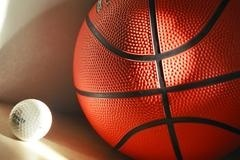
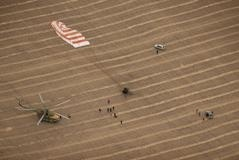

In [7]:
# visualize outliers
fd.vis.outliers_gallery()

In [8]:
# show outliers image data
fd.outliers().head(5)

index  outlier  nearest  distance                  img_filename_outlier  \
0   1338     2664     9763  0.476124   train/n02979186/n02979186_3967.JPEG   
1   1336     8150     7831  0.514679   train/n03445777/n03445777_5218.JPEG   
2   1335     1970     1513  0.515087  train/n02979186/n02979186_10186.JPEG   
3   1332     9087     8628  0.544796  train/n03888257/n03888257_34639.JPEG   
4   1331     2036    10033  0.553510  train/n02979186/n02979186_11265.JPEG   

     label_outlier split_outlier error_code_outlier  is_valid_outlier  \
0  cassette_player         train              VALID              True   
1        golf_ball         train              VALID              True   
2  cassette_player         train              VALID              True   
3        parachute         train              VALID              True   
4  cassette_player         train              VALID              True   

                   img_filename_nearest     label_nearest split_nearest  \
0      val/n01440764/n01440764_710.JPEG             tench           val   
1  train/n03445777/n03445777_18756.JPEG         golf_ball         train   
2   train/n02102040/n02102040_4835.JPEG  English_springer         train   
3  train/n03888257/n03888257_12053.JPEG         parachute         train   
4     val/n02102040/n02102040_3691.JPEG  English_springer           val   

  error_code_nearest  is_valid_nearest  
0              VALID              True  
1              VALID              True  
2              VALID              True  
3              VALID              True  
4              VALID              True

In [9]:
# show similar image pairs
fd.similarity().head(5)

from     to  distance                     img_filename_from  \
0  11521   5390  0.968786    val/n03394916/n03394916_30631.JPEG   
1   5390  11521  0.968786  train/n03394916/n03394916_44127.JPEG   
2  12914   7715  0.962459     val/n03445777/n03445777_6882.JPEG   
3   7715  12914  0.962459  train/n03445777/n03445777_13918.JPEG   
4   1117   1404  0.953837   train/n02102040/n02102040_1564.JPEG   

         label_from split_from error_code_from  is_valid_from  \
0       French_horn        val           VALID           True   
1       French_horn      train           VALID           True   
2         golf_ball        val           VALID           True   
3         golf_ball      train           VALID           True   
4  English_springer      train           VALID           True   

                        img_filename_to          label_to split_to  \
0  train/n03394916/n03394916_44127.JPEG       French_horn    train   
1    val/n03394916/n03394916_30631.JPEG       French_horn      val   
2  train/n03445777/n03445777_13918.JPEG         golf_ball    train   
3     val/n03445777/n03445777_6882.JPEG         golf_ball      val   
4   train/n02102040/n02102040_3837.JPEG  English_springer    train   

  error_code_to  is_valid_to  
0         VALID         True  
1         VALID         True  
2         VALID         True  
3         VALID         True  
4         VALID         True

tench


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 95.86it/s]


Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 2.3



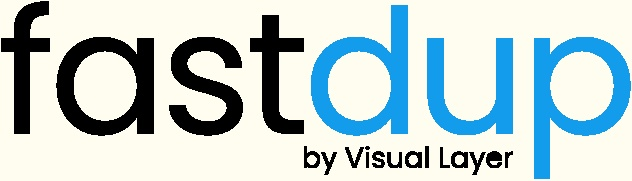
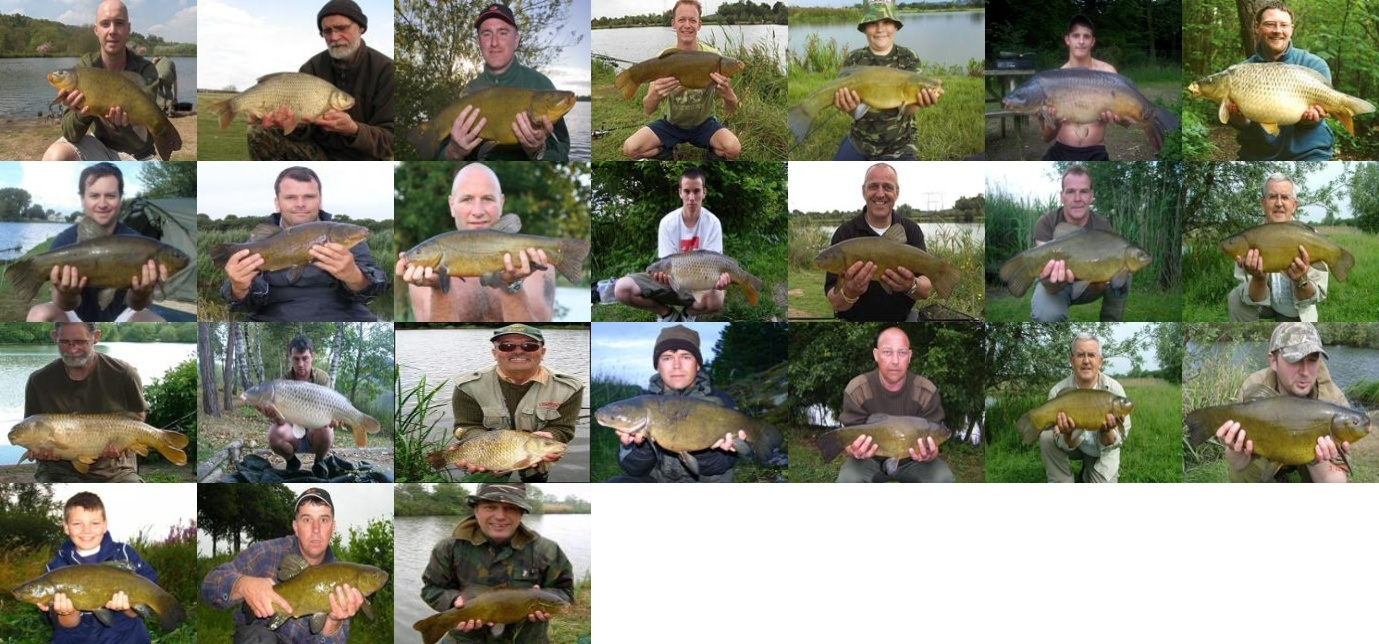
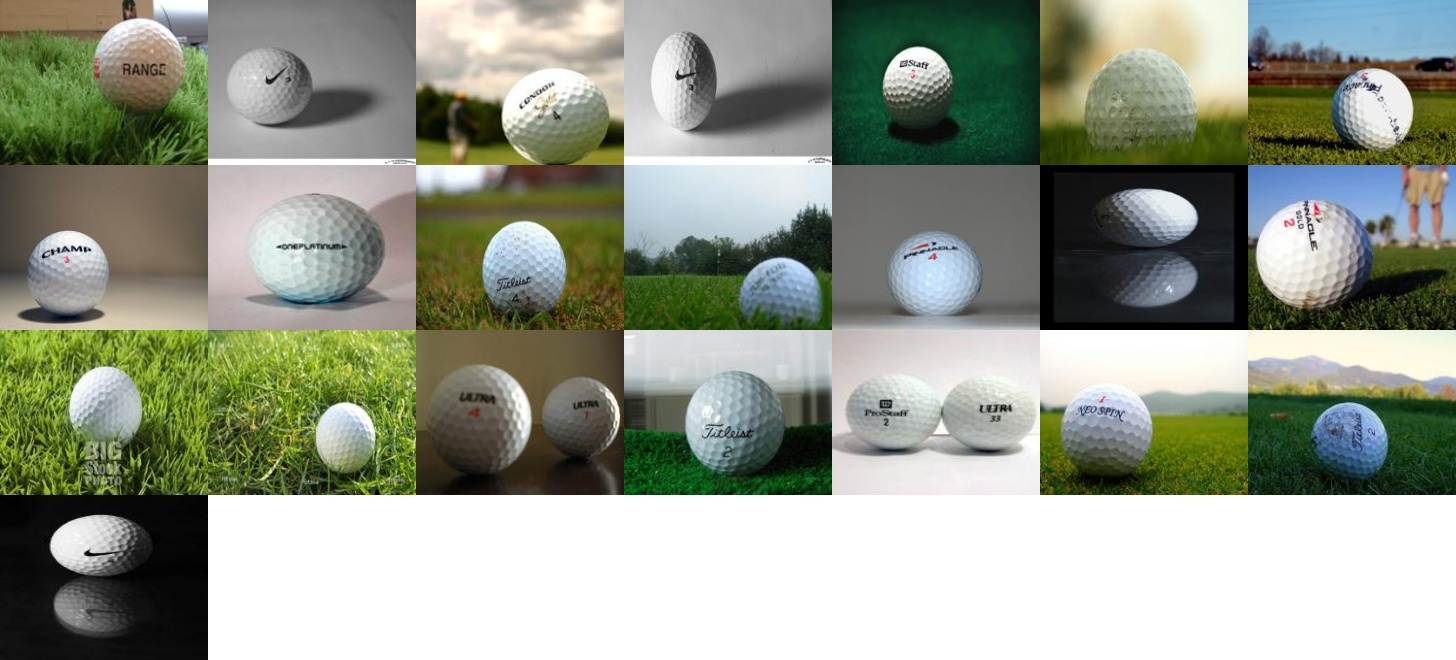
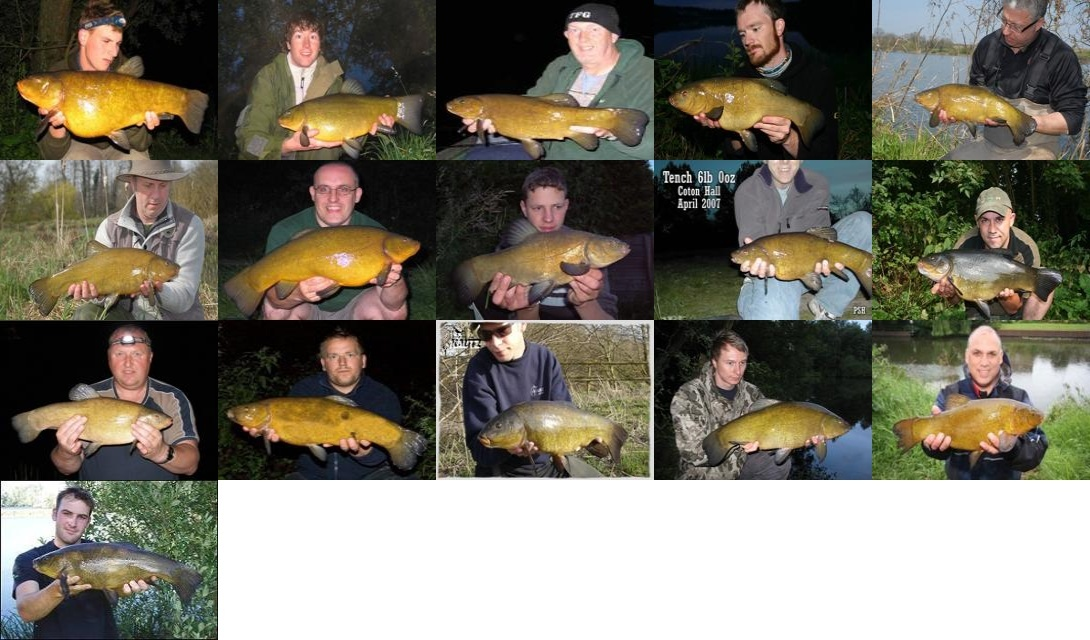
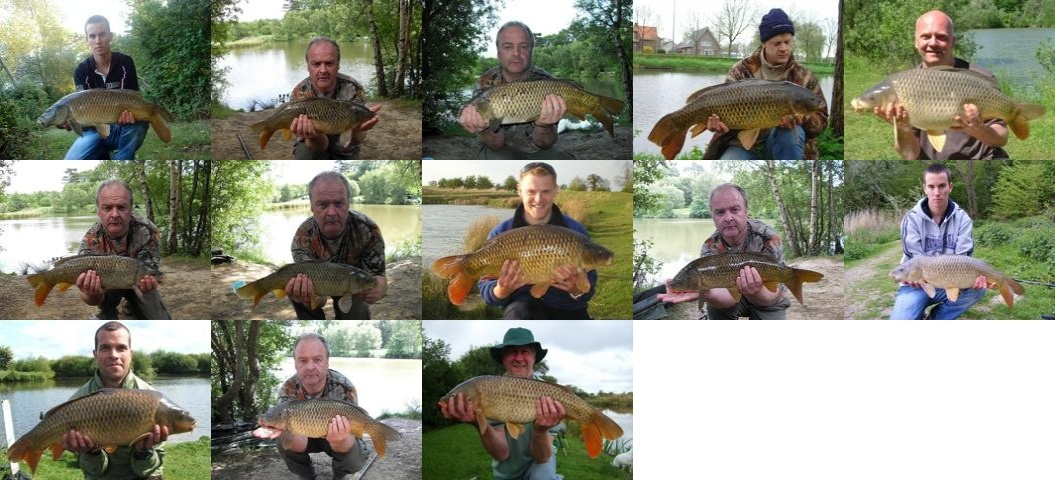
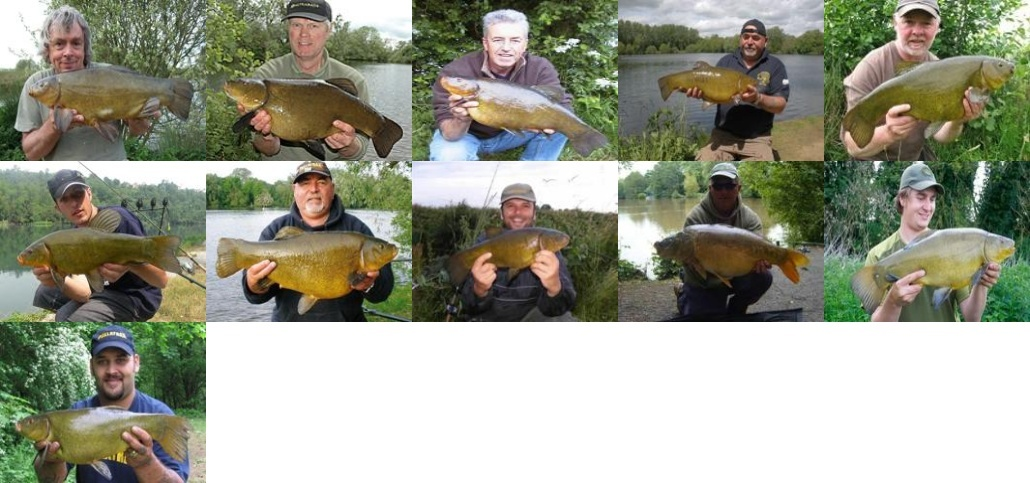
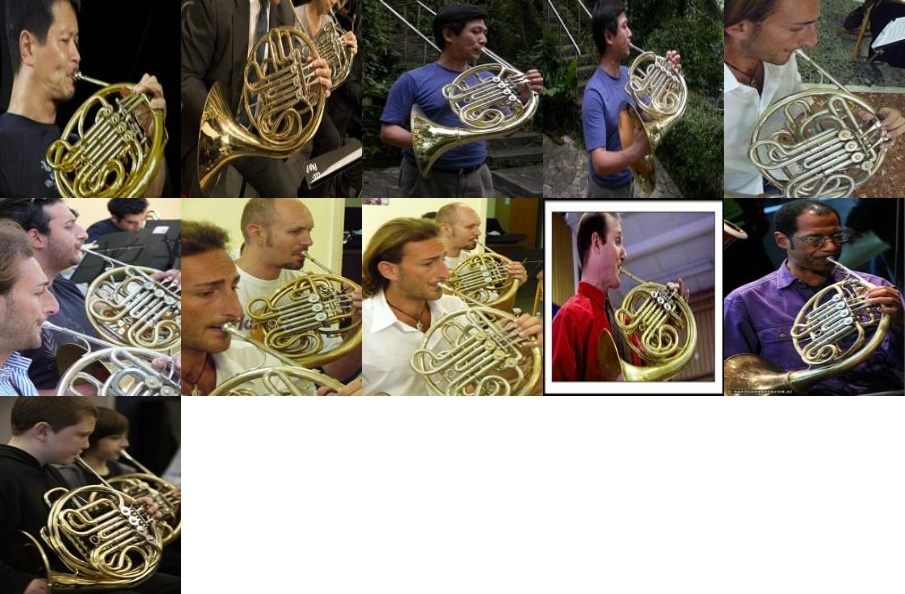
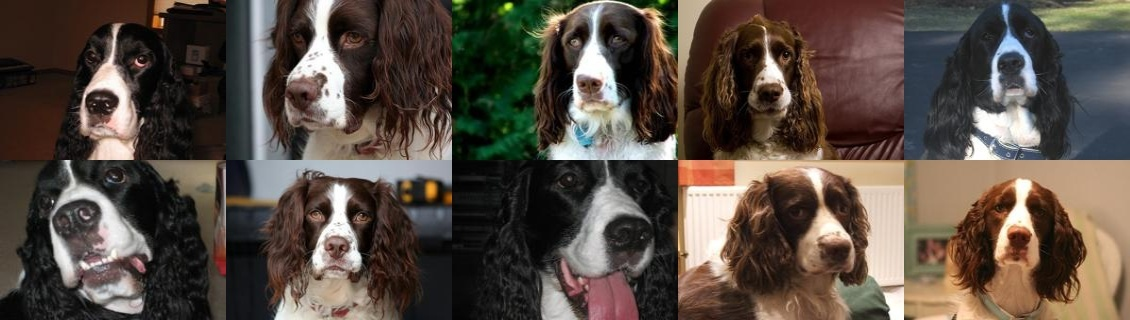
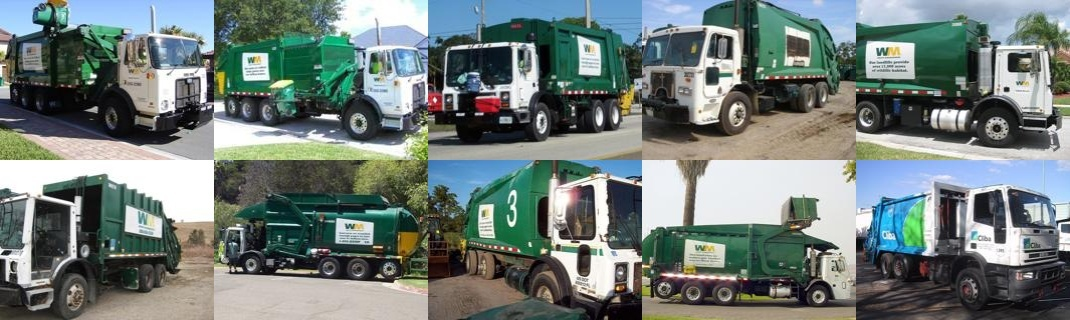
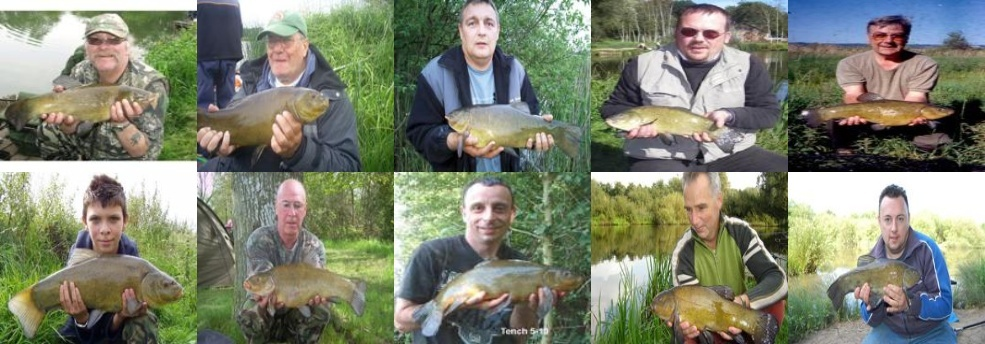
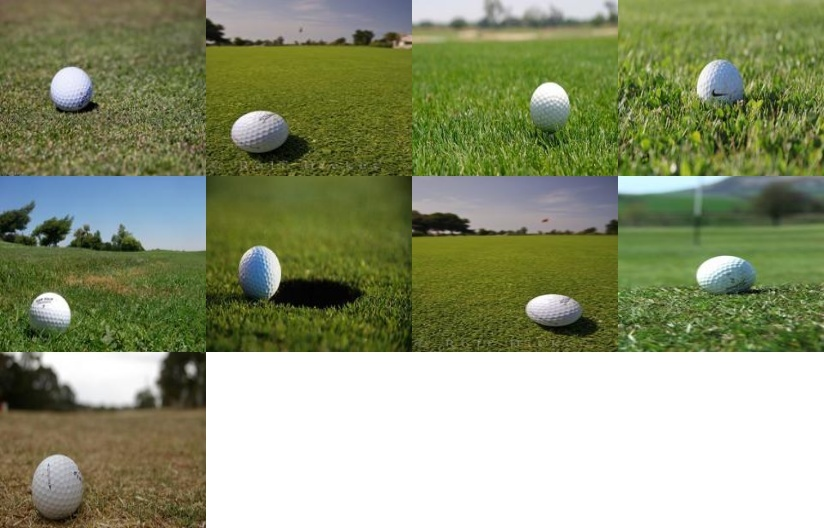
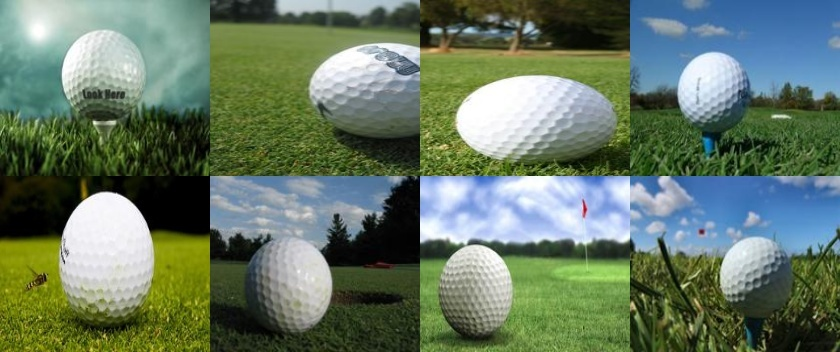
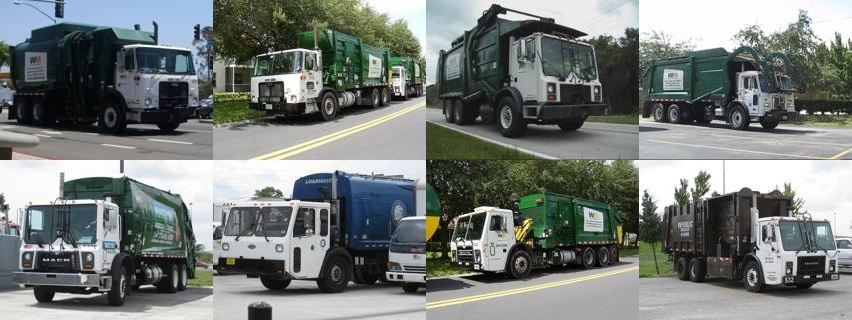
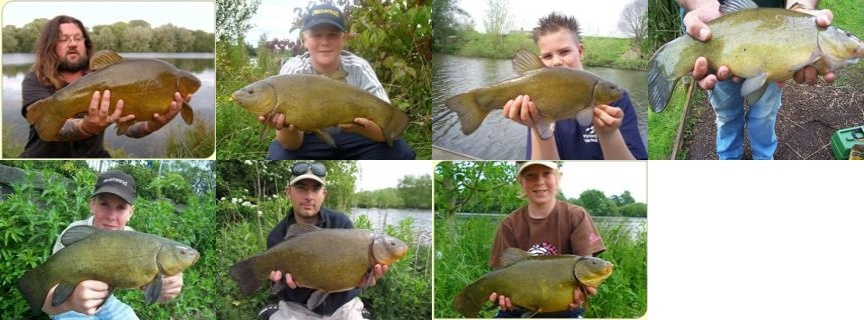
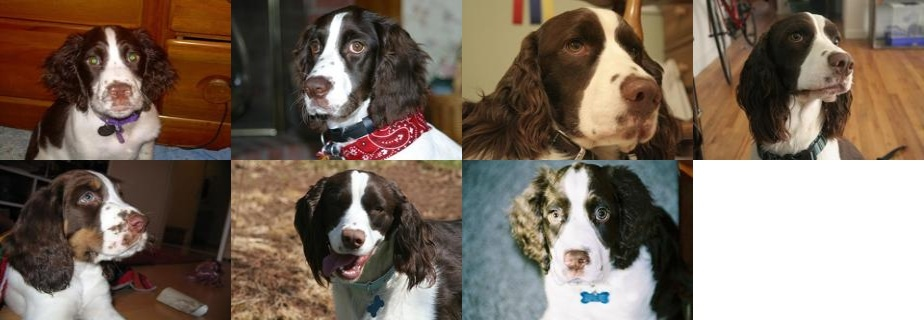
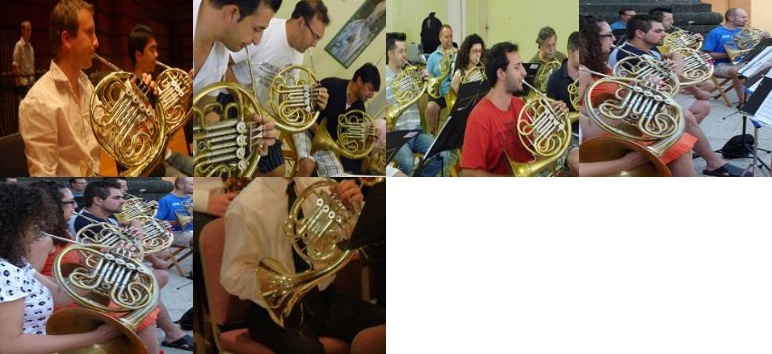
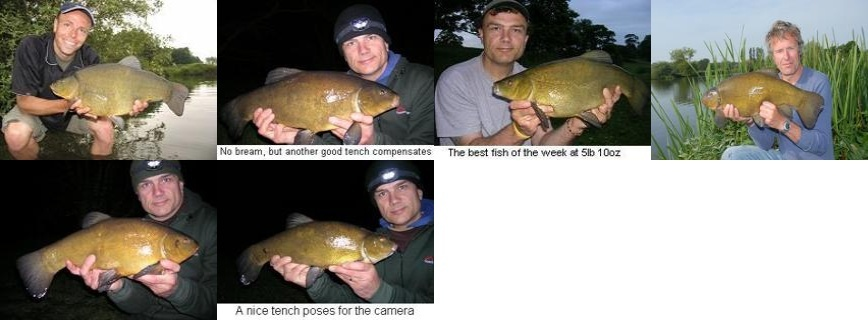
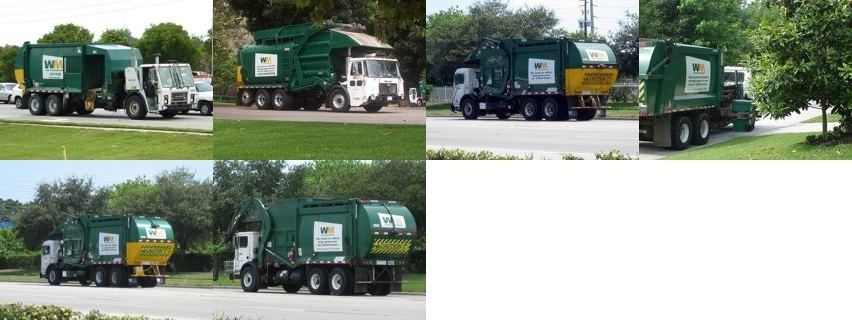
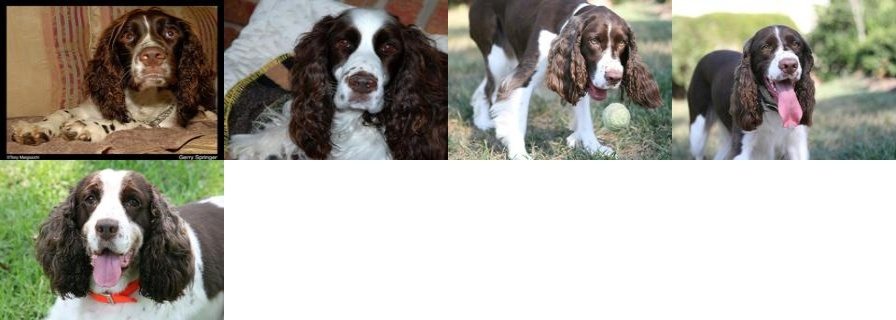
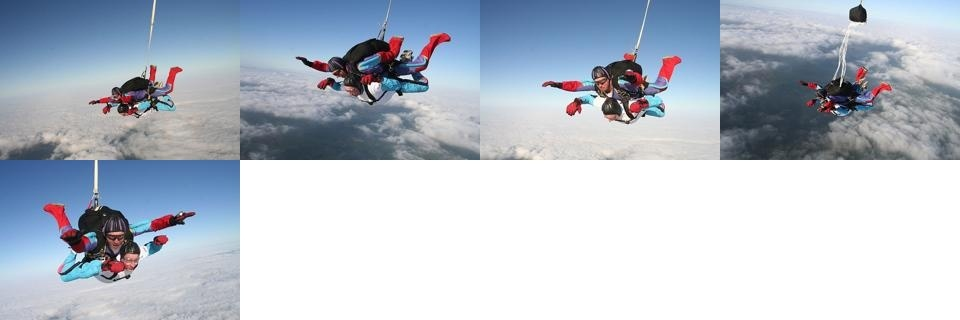
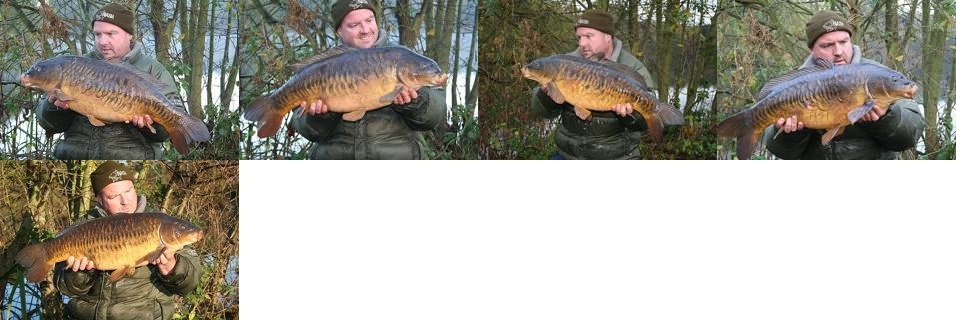

In [10]:
# visualize clusters
fd.vis.component_gallery()

chain_saw


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 442.39it/s]

Finished OK. Components are stored as image files fastdup_imagenette/galleries/components_[index].jpg
Stored components visual view in  fastdup_imagenette/galleries/components.html
Execution time in seconds 1.3



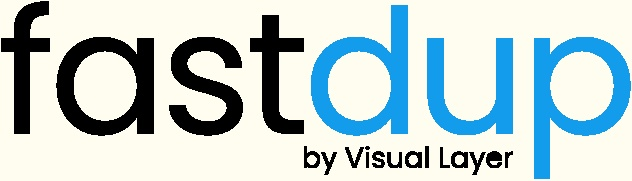
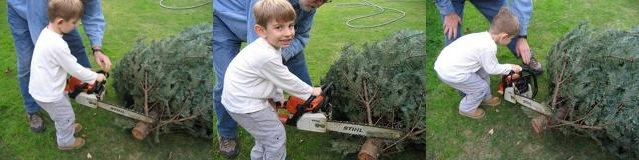
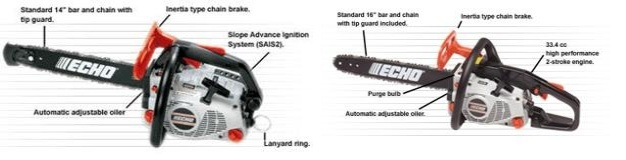
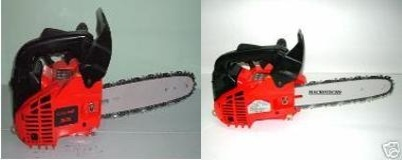
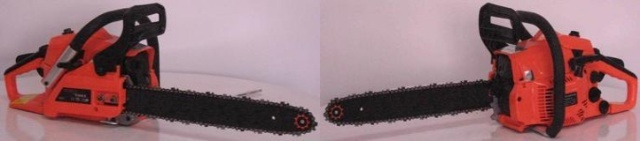
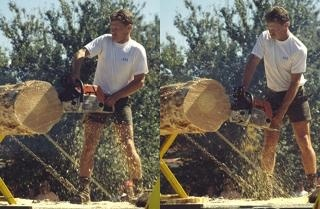
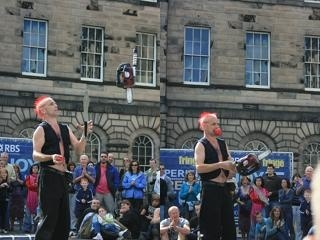
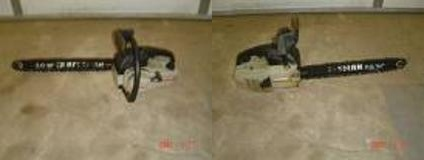
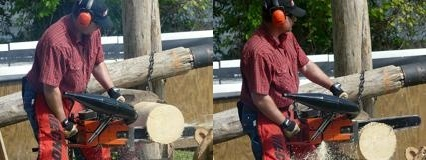
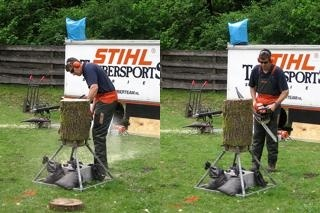
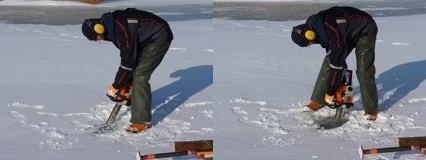
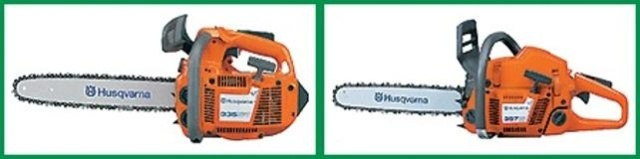

In [11]:
# visualize clusters with specific labels
fd.vis.component_gallery(slice='chain_saw')

In [12]:
# show connected components
cc_df, _ = fd.connected_components()
cc_df.sort_values('count', ascending=False).head(5)

fastdup_id  component_id      sum  count  mean_distance  min_distance  \
12991       12991          7331  36.6734   40.0         0.9168        0.9011   
8419         8419          7331  36.6734   40.0         0.9168        0.9011   
682           682            36  36.5815   40.0         0.9145        0.9003   
954           954            36  36.5815   40.0         0.9145        0.9003   
9706         9706            36  36.5815   40.0         0.9145        0.9003   

       max_distance                         img_filename      label  split  \
12991        0.9328    val/n03445777/n03445777_9552.JPEG  golf_ball    val   
8419         0.9328  train/n03445777/n03445777_8677.JPEG  golf_ball  train   
682          0.9339  train/n01440764/n01440764_6159.JPEG      tench  train   
954          0.9339  train/n01440764/n01440764_9885.JPEG      tench  train   
9706         0.9339    val/n01440764/n01440764_4980.JPEG      tench    val   

      error_code  is_valid  
12991      VALID      True  
8419       VALID      True  
682        VALID      True  
954        VALID      True  
9706       VALID      True

In [13]:
# getting metadata for individual images using their 'fastdup_id' available in fd.annotations()
fd[349]

{'img_filename': 'train/n01440764/n01440764_17789.JPEG',
 'label': 'tench',
 'split': 'train',
 'fastdup_id': 349,
 'error_code': 'VALID',
 'is_valid': True}